# Get the benchmark for retinal ganglion cell precision

In [94]:
from __future__ import print_function
import tableprint
import numpy as np
import h5py
from deepretina.modeltools import cc, fev, lli
from scipy.stats import pearsonr
from math import isnan
import brewer2mpl as mpl
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Whitenoise

In [2]:
filename = '/Users/lmcintosh/experiments/data/15-10-07/whitenoise.h5'
f = h5py.File(filename, 'r')
list(f)

[u'spikes', u'test', u'train']

In [3]:
all_repeats = f['test/repeats']

In [4]:
num_repeats = 6
num_cells = 9

pearsonrs = np.zeros((num_repeats, num_cells)) # pearson r
ccs = np.zeros((num_repeats, num_cells)) # correlation coefficient via numpy
fevs = np.zeros((num_repeats, num_cells)) # fraction variance explained
llis = np.zeros((num_repeats, num_cells)) # log likelihood improvement

for cell_idx, key in enumerate(list(all_repeats)):
    repeats = f['test/repeats/' + key]
    for rep in range(repeats.shape[0]):
        other_repeats = [i for i in range(repeats.shape[0]) if i != rep]
        average_other_repeat = np.mean(repeats[other_repeats], axis=0)
        pearsonrs[rep, cell_idx] = pearsonr(average_other_repeat, repeats[rep])[0]
        ccs[rep, cell_idx] = cc(average_other_repeat, repeats[rep])
        fevs[rep, cell_idx] = fev(average_other_repeat, repeats[rep])
        llis[rep, cell_idx] = lli(np.array(average_other_repeat), repeats[rep])

In [7]:
print(tableprint.hr(9))
print(tableprint.header(['cell 0', 'cell 1', 'cell 2', 'cell 3', 'cell 4', 'cell 5', 'cell 6', 'cell 7', 'cell 8']))
print(tableprint.hr(9))
print(tableprint.row(np.mean(pearsonrs, axis=0)))
print(tableprint.row(np.mean(ccs, axis=0)))
print(tableprint.row(np.mean(fevs, axis=0)))
print(tableprint.row(np.mean(llis, axis=0)))
print(tableprint.hr(9))

+-----------+------------+------------+------------+------------+------------+------------+------------+-----------+
|cell 0     | cell 1     | cell 2     | cell 3     | cell 4     | cell 5     | cell 6     | cell 7     | cell 8    |
+-----------+------------+------------+------------+------------+------------+------------+------------+-----------+
|   0.82179 |    0.59263 |    0.51395 |    0.84968 |    0.67737 |    0.58897 |    0.35028 |     0.3574 |   0.012609|
|   0.82179 |    0.59263 |    0.51395 |    0.84968 |    0.67737 |    0.58897 |    0.35028 |     0.3574 |   0.012609|
|   0.55903 |   -0.23348 |   -0.67488 |    0.64526 |   0.055597 |   -0.26886 |    -1.5741 |    -1.6394 |    -5.3845|
|    6.5662 |     6.5931 |     23.515 |     8.6988 |     15.686 |     7.1085 |    -5.7121 |    -10.069 |    -10.139|
+-----------+------------+------------+------------+------------+------------+------------+------------+-----------+


#### Across cells 0 to 4 (first five cells)

In [12]:
print(tableprint.hr(3))
print(tableprint.header(['correlation', 'f.e.v.', 'l.l.i.']))
print(tableprint.hr(3))
print(tableprint.row([np.mean(pearsonrs[:,:5]), np.mean(fevs[:,:5]), np.mean(llis[:,:5])]))
print(tableprint.hr(3))

+-----------+------------+-----------+
|correlation | f.e.v.     | l.l.i.    |
+-----------+------------+-----------+
|   0.69108 |   0.070303 |     12.212|
+-----------+------------+-----------+


In [13]:
f.close()

# Natural scenes

In [15]:
filename = '/Users/lmcintosh/experiments/data/15-10-07/naturalscene.h5'
f = h5py.File(filename, 'r')
all_repeats = f['test/repeats']

In [17]:
num_repeats = 6
num_cells = 9

pearsonrs = np.zeros((num_repeats, num_cells)) # pearson r
ccs = np.zeros((num_repeats, num_cells)) # correlation coefficient via numpy
fevs = np.zeros((num_repeats, num_cells)) # fraction variance explained
llis = np.zeros((num_repeats, num_cells)) # log likelihood improvement

for cell_idx, key in enumerate(list(all_repeats)):
    repeats = f['test/repeats/' + key]
    for rep in range(repeats.shape[0]):
        other_repeats = [i for i in range(repeats.shape[0]) if i != rep]
        average_other_repeat = np.mean(repeats[other_repeats], axis=0)
        pearsonrs[rep, cell_idx] = pearsonr(average_other_repeat, repeats[rep])[0]
        ccs[rep, cell_idx] = cc(average_other_repeat, repeats[rep])
        fevs[rep, cell_idx] = fev(average_other_repeat, repeats[rep])
        llis[rep, cell_idx] = lli(np.array(average_other_repeat), repeats[rep])

print(tableprint.hr(9))
print(tableprint.header(['cell 0', 'cell 1', 'cell 2', 'cell 3', 'cell 4', 'cell 5', 'cell 6', 'cell 7', 'cell 8']))
print(tableprint.hr(9))
print(tableprint.row(np.mean(pearsonrs, axis=0)))
print(tableprint.row(np.mean(ccs, axis=0)))
print(tableprint.row(np.mean(fevs, axis=0)))
print(tableprint.row(np.mean(llis, axis=0)))
print(tableprint.hr(9))

+-----------+------------+------------+------------+------------+------------+------------+------------+-----------+
|cell 0     | cell 1     | cell 2     | cell 3     | cell 4     | cell 5     | cell 6     | cell 7     | cell 8    |
+-----------+------------+------------+------------+------------+------------+------------+------------+-----------+
|   0.64975 |     0.4166 |     0.3958 |    0.66056 |    0.62141 |    0.50569 |    0.39033 |    0.34272 |  -0.015435|
|   0.64975 |     0.4166 |     0.3958 |    0.66056 |    0.62141 |    0.50569 |    0.39033 |    0.34272 |  -0.015435|
|   0.37654 |   -0.45578 |   -0.57656 |    0.41076 |    0.29812 |   -0.10092 |   -0.58713 |   -0.83546 |    -4.0507|
|    8.9547 |     2.7442 |     3.7002 |     12.163 |     18.548 |     4.8342 |   -0.90738 |    -7.7262 |    -7.8972|
+-----------+------------+------------+------------+------------+------------+------------+------------+-----------+


#### Across first five cells

In [18]:
print(tableprint.hr(3))
print(tableprint.header(['correlation', 'f.e.v.', 'l.l.i.']))
print(tableprint.hr(3))
print(tableprint.row([np.mean(pearsonrs[:,:5]), np.mean(fevs[:,:5]), np.mean(llis[:,:5])]))
print(tableprint.hr(3))

+-----------+------------+-----------+
|correlation | f.e.v.     | l.l.i.    |
+-----------+------------+-----------+
|   0.54882 |   0.010614 |     9.2219|
+-----------+------------+-----------+


In [19]:
f.close()

# Structured stimuli

In [47]:
filename = '/Users/lmcintosh/experiments/data/16-01-07/structured.h5'
f = h5py.File(filename, 'r')
all_repeats = f['test/repeats']

In [48]:
num_repeats = 3
num_cells = 33

pearsonrs = np.zeros((num_repeats, num_cells)) # pearson r
ccs = np.zeros((num_repeats, num_cells)) # correlation coefficient via numpy
fevs = np.zeros((num_repeats, num_cells)) # fraction variance explained
llis = np.zeros((num_repeats, num_cells)) # log likelihood improvement

for cell_idx, key in enumerate(list(all_repeats)):
    repeats = f['test/repeats/' + key]
    for rep in range(repeats.shape[0]):
        other_repeats = [i for i in range(repeats.shape[0]) if i != rep]
        average_other_repeat = np.mean(repeats[other_repeats], axis=0)
        pearsonrs[rep, cell_idx] = pearsonr(average_other_repeat, repeats[rep])[0]
        ccs[rep, cell_idx] = cc(average_other_repeat, repeats[rep])
        fevs[rep, cell_idx] = fev(average_other_repeat, repeats[rep])
        llis[rep, cell_idx] = lli(np.array(average_other_repeat), repeats[rep])

# just look at first 9 cells
print(tableprint.hr(9))
print(tableprint.header(['cell 0', 'cell 1', 'cell 2', 'cell 3', 'cell 4', 'cell 5', 'cell 6', 'cell 7', 'cell 8']))
print(tableprint.hr(9))
print(tableprint.row(np.mean(pearsonrs[:,:9], axis=0)))
print(tableprint.row(np.mean(ccs[:,:9], axis=0)))
print(tableprint.row(np.mean(fevs[:,:9], axis=0)))
print(tableprint.row(np.mean(llis[:,:9], axis=0)))
print(tableprint.hr(9))

+-----------+------------+------------+------------+------------+------------+------------+------------+-----------+
|cell 0     | cell 1     | cell 2     | cell 3     | cell 4     | cell 5     | cell 6     | cell 7     | cell 8    |
+-----------+------------+------------+------------+------------+------------+------------+------------+-----------+
|   0.72879 |    0.49239 |    0.43043 |   0.013919 |   0.084205 |    0.11707 |    0.24442 |    0.50037 |    0.66739|
|   0.72879 |    0.49239 |    0.43043 |   0.013919 |   0.084205 |    0.11707 |    0.24442 |    0.50037 |    0.66739|
|   0.38646 |   -0.24777 |   -0.44839 |    -1.9425 |    -1.6905 |    -1.5702 |    -1.1436 |   -0.33145 |    0.24141|
|     8.257 |    -69.072 |    -2.1248 |    -33.928 |    -62.165 |    -25.032 |    -91.812 |    -7.4598 |     8.5147|
+-----------+------------+------------+------------+------------+------------+------------+------------+-----------+


<Container object of 10 artists>

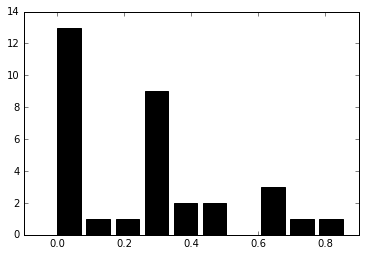

In [56]:
counts, bins = np.histogram(np.nanmean(pearsonrs, axis=0))
plt.bar(bins[:-1], counts, width=0.07, color='k')

In [46]:
f.close()

In [87]:
filename = '/Users/lmcintosh/experiments/data/16-01-08/structured.h5'
f = h5py.File(filename, 'r')
all_repeats = f['test/repeats']

In [88]:
num_repeats = 3
num_cells = 14

pearsonrs = np.zeros((num_repeats, num_cells)) # pearson r
ccs = np.zeros((num_repeats, num_cells)) # correlation coefficient via numpy
fevs = np.zeros((num_repeats, num_cells)) # fraction variance explained
llis = np.zeros((num_repeats, num_cells)) # log likelihood improvement

for cell_idx, key in enumerate(list(all_repeats)):
    repeats = f['test/repeats/' + key]
    for rep in range(repeats.shape[0]):
        other_repeats = [i for i in range(repeats.shape[0]) if i != rep]
        average_other_repeat = np.mean(repeats[other_repeats], axis=0)
        pearsonrs[rep, cell_idx] = pearsonr(average_other_repeat, repeats[rep])[0]
        ccs[rep, cell_idx] = cc(average_other_repeat, repeats[rep])
        fevs[rep, cell_idx] = fev(average_other_repeat, repeats[rep])
        llis[rep, cell_idx] = lli(np.array(average_other_repeat), repeats[rep])

# just look at first 9 cells
print(tableprint.hr(9))
print(tableprint.header(['cell 0', 'cell 1', 'cell 2', 'cell 3', 'cell 4', 'cell 5', 'cell 6', 'cell 7', 'cell 8']))
print(tableprint.hr(9))
print(tableprint.row(np.mean(pearsonrs[:,:9], axis=0)))
print(tableprint.row(np.mean(ccs[:,:9], axis=0)))
print(tableprint.row(np.mean(fevs[:,:9], axis=0)))
print(tableprint.row(np.mean(llis[:,:9], axis=0)))
print(tableprint.hr(9))

+-----------+------------+------------+------------+------------+------------+------------+------------+-----------+
|cell 0     | cell 1     | cell 2     | cell 3     | cell 4     | cell 5     | cell 6     | cell 7     | cell 8    |
+-----------+------------+------------+------------+------------+------------+------------+------------+-----------+
|    0.6551 |    0.17254 |    0.29339 |    0.58913 |        nan |    0.22524 |   0.098713 |        nan |    0.22317|
|    0.6551 |    0.17254 |    0.29339 |    0.58913 |        nan |    0.22524 |   0.098713 |        nan |    0.22317|
|   0.20148 |    -1.3782 |    -0.9509 |  -0.060762 |    -2.6688 |    -2.0744 |    -2.1229 |    -1.4669 |    -1.2985|
|   -3.1931 |    -29.701 |    -21.036 |    -4.8229 |        nan |    -83.806 |    -86.464 |        nan |    -17.696|
+-----------+------------+------------+------------+------------+------------+------------+------------+-----------+


<Container object of 10 artists>

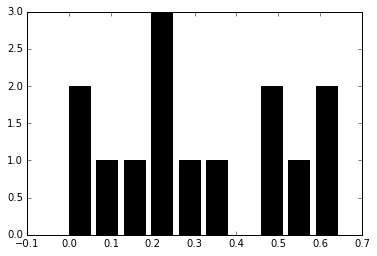

In [89]:
mean_cc = np.nanmean(pearsonrs, axis=0)
avoid_nans = [i for i in range(len(mean_cc)) if not isnan(mean_cc[i])]
counts, bins = np.histogram(mean_cc[avoid_nans])
plt.bar(bins[:-1], counts, width=.05, color='k')

# Natural movie

In [27]:
filename = '/Users/lmcintosh/experiments/data/16-01-07/naturalmovie.h5'
f = h5py.File(filename, 'r')
all_repeats = f['test/repeats']

In [28]:
num_repeats = 3
num_cells = 33

pearsonrs = np.zeros((num_repeats, num_cells)) # pearson r
ccs = np.zeros((num_repeats, num_cells)) # correlation coefficient via numpy
fevs = np.zeros((num_repeats, num_cells)) # fraction variance explained
llis = np.zeros((num_repeats, num_cells)) # log likelihood improvement

for cell_idx, key in enumerate(list(all_repeats)):
    repeats = f['test/repeats/' + key]
    for rep in range(repeats.shape[0]):
        other_repeats = [i for i in range(repeats.shape[0]) if i != rep]
        average_other_repeat = np.mean(repeats[other_repeats], axis=0)
        pearsonrs[rep, cell_idx] = pearsonr(average_other_repeat, repeats[rep])[0]
        ccs[rep, cell_idx] = cc(average_other_repeat, repeats[rep])
        fevs[rep, cell_idx] = fev(average_other_repeat, repeats[rep])
        llis[rep, cell_idx] = lli(np.array(average_other_repeat), repeats[rep])

# just look at first 9 cells
print(tableprint.hr(9))
print(tableprint.header(['cell 0', 'cell 1', 'cell 2', 'cell 3', 'cell 4', 'cell 5', 'cell 6', 'cell 7', 'cell 8']))
print(tableprint.hr(9))
print(tableprint.row(np.mean(pearsonrs[:,:9], axis=0)))
print(tableprint.row(np.mean(ccs[:,:9], axis=0)))
print(tableprint.row(np.mean(fevs[:,:9], axis=0)))
print(tableprint.row(np.mean(llis[:,:9], axis=0)))
print(tableprint.hr(9))

+-----------+------------+------------+------------+------------+------------+------------+------------+-----------+
|cell 0     | cell 1     | cell 2     | cell 3     | cell 4     | cell 5     | cell 6     | cell 7     | cell 8    |
+-----------+------------+------------+------------+------------+------------+------------+------------+-----------+
|   0.64431 |    0.63779 |    0.37948 | -0.0029353 | -0.0019541 |    0.27431 |    0.40143 |    0.48189 |    0.40408|
|   0.64431 |    0.63779 |    0.37948 | -0.0029353 | -0.0019541 |    0.27431 |    0.40143 |    0.48189 |    0.40408|
|   0.13911 |   0.061803 |   -0.63463 |    -2.0613 |    -2.2045 |   -0.97492 |    -0.6544 |   -0.77887 |   -0.55454|
|   -14.354 |      -6.84 |    -15.346 |     -46.73 |    -70.223 |    -40.103 |    -124.91 |     151.72 |    -467.37|
+-----------+------------+------------+------------+------------+------------+------------+------------+-----------+


<Container object of 10 artists>

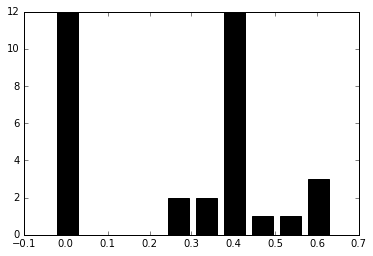

In [38]:
counts, bins = np.histogram(np.mean(pearsonrs, axis=0))
plt.bar(bins[:-1], counts, width=.05, color='k')

In [57]:
f.close()

In [58]:
filename = '/Users/lmcintosh/experiments/data/16-01-08/naturalmovie.h5'
f = h5py.File(filename, 'r')
all_repeats = f['test/repeats']

In [59]:
num_repeats = 3
num_cells = 14

pearsonrs = np.zeros((num_repeats, num_cells)) # pearson r
ccs = np.zeros((num_repeats, num_cells)) # correlation coefficient via numpy
fevs = np.zeros((num_repeats, num_cells)) # fraction variance explained
llis = np.zeros((num_repeats, num_cells)) # log likelihood improvement

for cell_idx, key in enumerate(list(all_repeats)):
    repeats = f['test/repeats/' + key]
    for rep in range(repeats.shape[0]):
        other_repeats = [i for i in range(repeats.shape[0]) if i != rep]
        average_other_repeat = np.mean(repeats[other_repeats], axis=0)
        pearsonrs[rep, cell_idx] = pearsonr(average_other_repeat, repeats[rep])[0]
        ccs[rep, cell_idx] = cc(average_other_repeat, repeats[rep])
        fevs[rep, cell_idx] = fev(average_other_repeat, repeats[rep])
        llis[rep, cell_idx] = lli(np.array(average_other_repeat), repeats[rep])

# just look at first 9 cells
print(tableprint.hr(9))
print(tableprint.header(['cell 0', 'cell 1', 'cell 2', 'cell 3', 'cell 4', 'cell 5', 'cell 6', 'cell 7', 'cell 8']))
print(tableprint.hr(9))
print(tableprint.row(np.mean(pearsonrs[:,:9], axis=0)))
print(tableprint.row(np.mean(ccs[:,:9], axis=0)))
print(tableprint.row(np.mean(fevs[:,:9], axis=0)))
print(tableprint.row(np.mean(llis[:,:9], axis=0)))
print(tableprint.hr(9))

+-----------+------------+------------+------------+------------+------------+------------+------------+-----------+
|cell 0     | cell 1     | cell 2     | cell 3     | cell 4     | cell 5     | cell 6     | cell 7     | cell 8    |
+-----------+------------+------------+------------+------------+------------+------------+------------+-----------+
|    0.7853 |    0.34393 |    0.37864 |     0.7012 |        nan |   0.092987 |    0.10988 |        nan |    0.37406|
|    0.7853 |    0.34393 |    0.37864 |     0.7012 |        nan |   0.092987 |    0.10988 |        nan |    0.37406|
|    0.3865 |   -0.99419 |   -0.74028 |   0.082993 |        nan |    -2.3629 |    -3.3756 |    -18.766 |    -1.0254|
|    2.7893 |    -34.465 |    -23.098 |    -6.4358 |        nan |    -3549.5 |    -123.17 |        nan |    -33.062|
+-----------+------------+------------+------------+------------+------------+------------+------------+-----------+


<Container object of 10 artists>

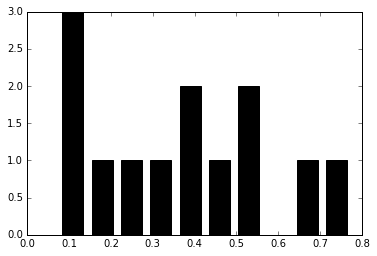

In [86]:
mean_cc = np.nanmean(pearsonrs, axis=0)
avoid_nans = [i for i in range(len(mean_cc)) if not isnan(mean_cc[i])]
counts, bins = np.histogram(mean_cc[avoid_nans])
plt.bar(bins[:-1], counts, width=.05, color='k')

# overlay performance for a variety of experiments, stimulus types

In [92]:
def get_performances(expt_day='15-10-07', stimulus_type='whitenoise'):
    filename = '/Users/lmcintosh/experiments/data/%s/%s.h5' %(expt_day, stimulus_type)
    f = h5py.File(filename, 'r')
    all_repeats = f['test/repeats']
    
    num_repeats = all_repeats[list(all_repeats)[0]].shape[0]
    num_cells = len(list(all_repeats))

    pearsonrs = np.zeros((num_repeats, num_cells)) # pearson r
    fevs = np.zeros((num_repeats, num_cells)) # fraction variance explained
    llis = np.zeros((num_repeats, num_cells)) # log likelihood improvement

    for cell_idx, key in enumerate(list(all_repeats)):
        repeats = f['test/repeats/' + key]
        for rep in range(repeats.shape[0]):
            other_repeats = [i for i in range(repeats.shape[0]) if i != rep]
            average_other_repeat = np.mean(repeats[other_repeats], axis=0)
            pearsonrs[rep, cell_idx] = pearsonr(average_other_repeat, repeats[rep])[0]
            fevs[rep, cell_idx] = fev(average_other_repeat, repeats[rep])
            llis[rep, cell_idx] = lli(np.array(average_other_repeat), repeats[rep])
            
    return pearsonrs, fevs, llis

In [93]:
expt_days = ['15-10-07', '15-11-21a', '15-11-21b', '16-01-07', '16-01-08']
stimulus_types = ['whitenoise', 'naturalscene', 'structured', 'naturalmovie']

In [98]:
colormap = mpl.get_map('Set1', 'Qualitative', 9)
colors = colormap.mpl_colors

In [108]:
import seaborn as sns

/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


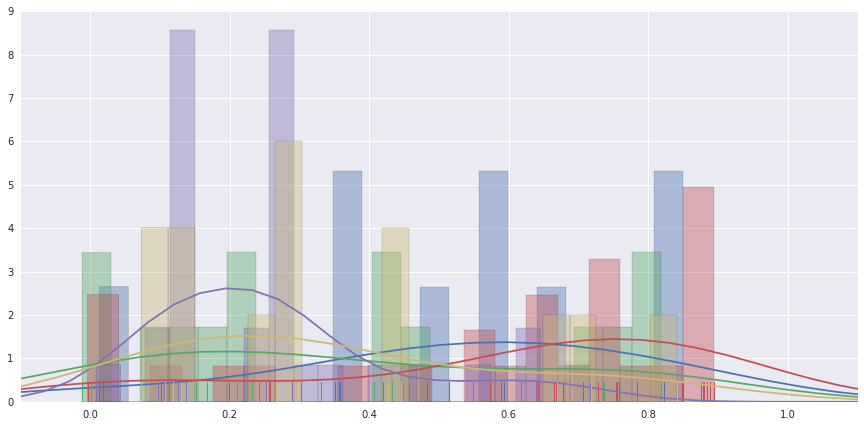

In [111]:
fig = plt.gcf()
fig.set_size_inches((15,7))

for ide, expt in enumerate(expt_days):
    pearsonrs, fevs, llis = get_performances(expt_day=expt, stimulus_type='whitenoise')
    
    # average across repeats, so get one number per cell
    mean_cc = np.nanmean(pearsonrs, axis=0)
    avoid_nans = [i for i in range(len(mean_cc)) if not isnan(mean_cc[i])]
#     count, bins = np.histogram(mean_cc[avoid_nans])
#     plt.bar(bins[:-1], count, color=colors[ide], alpha=0.4, width=0.05)
    sns.distplot(mean_cc[avoid_nans], bins=20, kde=True, rug=True);
    plt.xlim([-.1, 1.1])

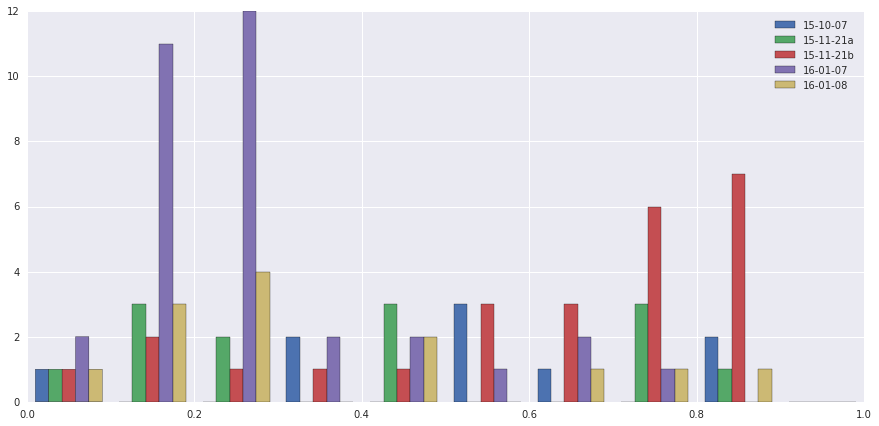

In [129]:
fig = plt.gcf()
fig.set_size_inches((15,7))
ax = plt.gca()

# counts = []
ccs = []
for ide, expt in enumerate(expt_days):
    pearsonrs, fevs, llis = get_performances(expt_day=expt, stimulus_type='whitenoise')
    
    # average across repeats, so get one number per cell
    mean_cc = np.nanmean(pearsonrs, axis=0)
    avoid_nans = [i for i in range(len(mean_cc)) if not isnan(mean_cc[i])]
    ccs.append(mean_cc[avoid_nans])
#     bins = np.linspace(0,1,11)
#     count, bins = np.histogram(mean_cc[avoid_nans], bins=bins)
#     counts.append(count)
bins = np.linspace(0,1,11)
blah = ax.hist(ccs, bins, histtype='bar', label=expt_days)
ax.legend(prop={'size': 10})
# plt.bar(bins[:-1], np.vstack(counts).T, color=colors[ide], alpha=0.4, width=0.05)
#     sns.distplot(mean_cc[avoid_nans], bins=20, kde=True, rug=True);
#     plt.xlim([-.1, 1.1])

# Natural movie

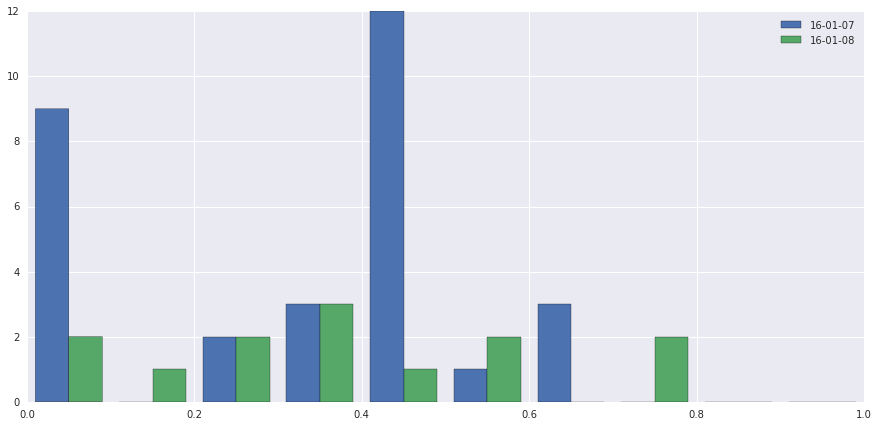

In [130]:
expt_days = ['16-01-07', '16-01-08']

fig = plt.gcf()
fig.set_size_inches((15,7))
ax = plt.gca()

ccs = []
for ide, expt in enumerate(expt_days):
    pearsonrs, fevs, llis = get_performances(expt_day=expt, stimulus_type='naturalmovie')
    
    # average across repeats, so get one number per cell
    mean_cc = np.nanmean(pearsonrs, axis=0)
    avoid_nans = [i for i in range(len(mean_cc)) if not isnan(mean_cc[i])]
    ccs.append(mean_cc[avoid_nans])

    bins = np.linspace(0,1,11)
blah = ax.hist(ccs, bins, histtype='bar', label=expt_days)
ax.legend(prop={'size': 10})

# Structured stimuli

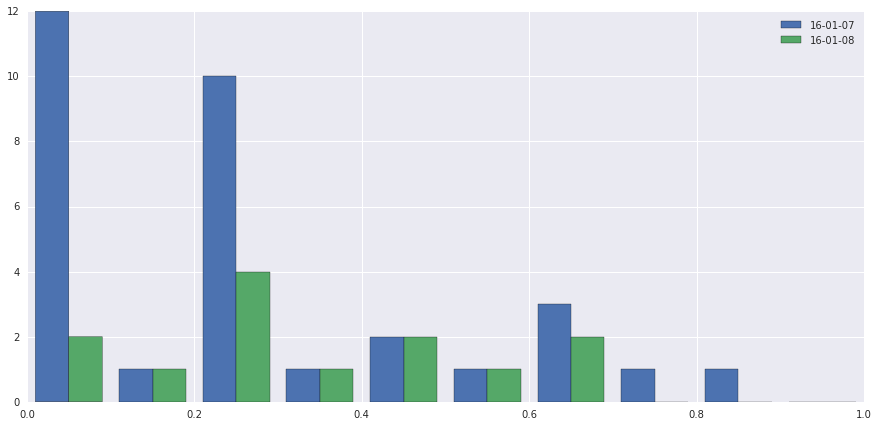

In [131]:
expt_days = ['16-01-07', '16-01-08']

fig = plt.gcf()
fig.set_size_inches((15,7))
ax = plt.gca()

ccs = []
for ide, expt in enumerate(expt_days):
    pearsonrs, fevs, llis = get_performances(expt_day=expt, stimulus_type='structured')
    
    # average across repeats, so get one number per cell
    mean_cc = np.nanmean(pearsonrs, axis=0)
    avoid_nans = [i for i in range(len(mean_cc)) if not isnan(mean_cc[i])]
    ccs.append(mean_cc[avoid_nans])

    bins = np.linspace(0,1,11)
blah = ax.hist(ccs, bins, histtype='bar', label=expt_days)
ax.legend(prop={'size': 10})

# Whitenoise vs naturalscene

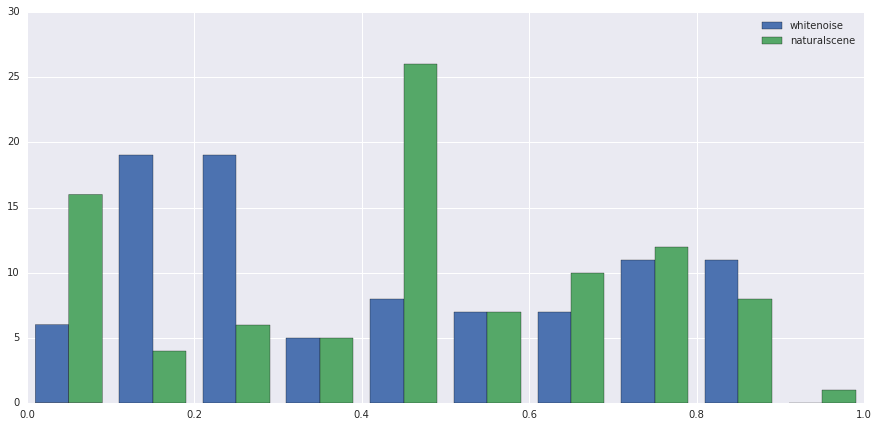

In [132]:
expt_days = ['15-10-07', '15-11-21a', '15-11-21b', '16-01-07', '16-01-08']
stimulus_types = ['whitenoise', 'naturalscene']

fig = plt.gcf()
fig.set_size_inches((15,7))
ax = plt.gca()

white_ccs = []
natural_ccs = []
for ide, expt in enumerate(expt_days):
    for stim_type in stimulus_types:
        pearsonrs, fevs, llis = get_performances(expt_day=expt, stimulus_type=stim_type)

        # average across repeats, so get one number per cell
        mean_cc = np.nanmean(pearsonrs, axis=0)
        avoid_nans = [i for i in range(len(mean_cc)) if not isnan(mean_cc[i])]
        
        if stim_type is 'whitenoise':
            white_ccs.extend(mean_cc[avoid_nans])
        else:
            natural_ccs.extend(mean_cc[avoid_nans])

bins = np.linspace(0,1,11)
blah = ax.hist([white_ccs, natural_ccs], bins, histtype='bar', label=stimulus_types)
ax.legend(prop={'size': 10})

# track cell's performance on four stimulus types

In [133]:
expt_days = ['16-01-07', '16-01-08']
stimulus_types = ['whitenoise', 'naturalscene', 'structured', 'naturalmovie']

In [135]:
# fig = plt.gcf()
# fig.set_size_inches((15,7))
# ax = plt.gca()

white_ccs = []
natural_ccs = []
movie_ccs = []
structured_ccs = []
for stim_type in stimulus_types:
    for ide, expt in enumerate(expt_days):
        pearsonrs, fevs, llis = get_performances(expt_day=expt, stimulus_type=stim_type)

        # average across repeats, so get one number per cell
        mean_cc = np.nanmean(pearsonrs, axis=0)
#         avoid_nans = [i for i in range(len(mean_cc)) if not isnan(mean_cc[i])]
        
        if stim_type is 'whitenoise':
            white_ccs.extend(mean_cc)
        elif stim_type is 'naturalscene':
            natural_ccs.extend(mean_cc)
        elif stim_type is 'structured':
            structured_ccs.extend(mean_cc)
        elif stim_type is 'naturalmovie':
            movie_ccs.extend(mean_cc)

In [140]:
avoid_nans = [i for i in range(len(white_ccs)) if not isnan(white_ccs[i])]

In [145]:
natural_ccs = [i for idi,i in enumerate(natural_ccs) if not isnan(white_ccs[idi])]
structured_ccs = [i for idi,i in enumerate(structured_ccs) if not isnan(white_ccs[idi])]
movie_ccs = [i for idi,i in enumerate(movie_ccs) if not isnan(white_ccs[idi])]
white_ccs = [i for idi,i in enumerate(white_ccs) if not isnan(white_ccs[idi])]

In [146]:
(len(white_ccs), len(natural_ccs))

(46, 46)

In [154]:
all_ccs = np.vstack([white_ccs, natural_ccs, structured_ccs, movie_ccs])

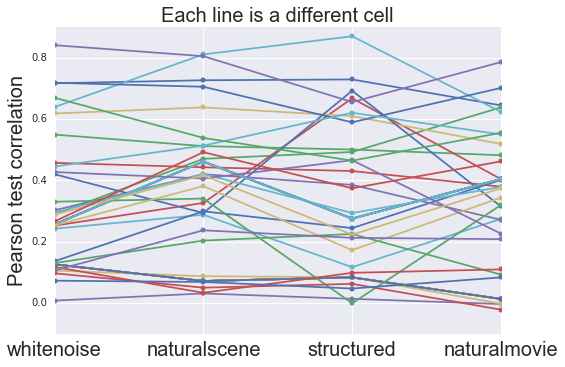

In [162]:
x = np.arange(4)
blah = plt.plot(all_ccs, '.-', markersize=10)
blah = plt.xticks(x, stimulus_types, rotation='horizontal', fontsize=20)
blah = plt.title('Each line is a different cell', fontsize=20)
blah = plt.ylabel('Pearson test correlation', fontsize=20)

In [168]:
diffs = np.diff(all_ccs, axis=0)
np.mean(diffs, axis=1)

array([ 0.05467666, -0.04748484,  0.00658315])